In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
def number_missing_value(df):

    number_of_missing = df.isnull().sum()
    number_of_missing = number_of_missing[number_of_missing>0].sort_values()

    return number_of_missing

In [ ]:
# write here the code for 2.1 Load the Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/OnlineNewsPopularity.csv')

df.columns = df.columns.str.replace(' ', '')

missed_value = number_missing_value(df)
counter_missed = 0
for i in range(0,len(missed_value)):
    counter_missed += missed_value[i]
print("Percentage of values lost against total data = " + str(counter_missed*100/len(df)))

df = df.dropna().reset_index(drop=True)



Percentage of values lost against total data = 0.0


We removed the spaces from the data frame columns' name

Then we calculated the number of missing data related to each column by defining number_missing_value function

Because the percentage of the nan datas are little we can delete them. (In maximum they are below 1%, although some of them can be same for a specific raw)

# ----------------------------------------------------------------------------------



In [ ]:
for column in df.columns:
    print(pd.api.types.infer_dtype(df[column]))

string
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
integer


In [ ]:
column_name = df.columns
print(column_name[9] + '  ' + column_name[10] + '  ' + column_name[37] + '  ' + column_name[60])


num_imgs  num_videos  weekday_is_sunday  shares


In [ ]:
df['num_imgs'] = pd.to_numeric(df['num_imgs'], errors='coerce' )
df['num_videos'] = pd.to_numeric(df['num_videos'], errors='coerce' )
df['weekday_is_sunday'] = pd.to_numeric(df['weekday_is_sunday'], errors='coerce' )
df['shares'] = pd.to_numeric(df['shares'], errors='coerce' )


In [ ]:
print(number_missing_value(df))


Series([], dtype: int64)


In [ ]:
df['num_imgs'] = df['num_imgs'].fillna(df['num_imgs'].mean())
df['num_videos'] = df['num_videos'].fillna(df['num_videos'].mean())
df['weekday_is_sunday'] = df['weekday_is_sunday'].fillna(df['weekday_is_sunday'].mean())
df['shares'] = df['shares'].fillna(round(df['shares'].mean()))
df['shares'] = df['shares'].astype(int)




In the last two cells, we first check the data type of our columns and after checking we realize that we have mixed data types in four columns. we solve this issue by using the Pandas to_numeric function and then we calculate the number of missing values, this time we fill the NaN values with the mean of related columns instead of removing them.


In [ ]:
# write here the code for 2.2 Dataset Analysis
len(df)

39644

In [ ]:
pd.set_option('display.max_columns', 100)
df.head(15)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.6000,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.1250,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.8000,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.6000,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.5000,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,0.0,4.359459,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8500.0,8500.0,8500.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022245,0.306718,0.022231,0.022224,0.626582,0.437409,0.071184,0.029730,0.027027,0.523810,0.476190,0.350610,0.136364,0.6,-0.195000,-0.4000,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,http://mashable.com/2013/01/07/bodymedia-armba...,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,0.0,4.654167,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020082,0.114705,0.020024,0.020015,0.825173,0.514480,0.268303,0.080208,0.016667,0.827957,0.172043,0.402039,0.100000,1.0,-0.224479,-0.5000,-0.050000,0.000000,0.

In [ ]:
# We dropped 'url' feature and 'timedelta' feature ecause they are not useful
df = df.drop('url', axis=1)
df = df.drop('timedelta', axis=1)

<Axes: xlabel='shares', ylabel='Count'>

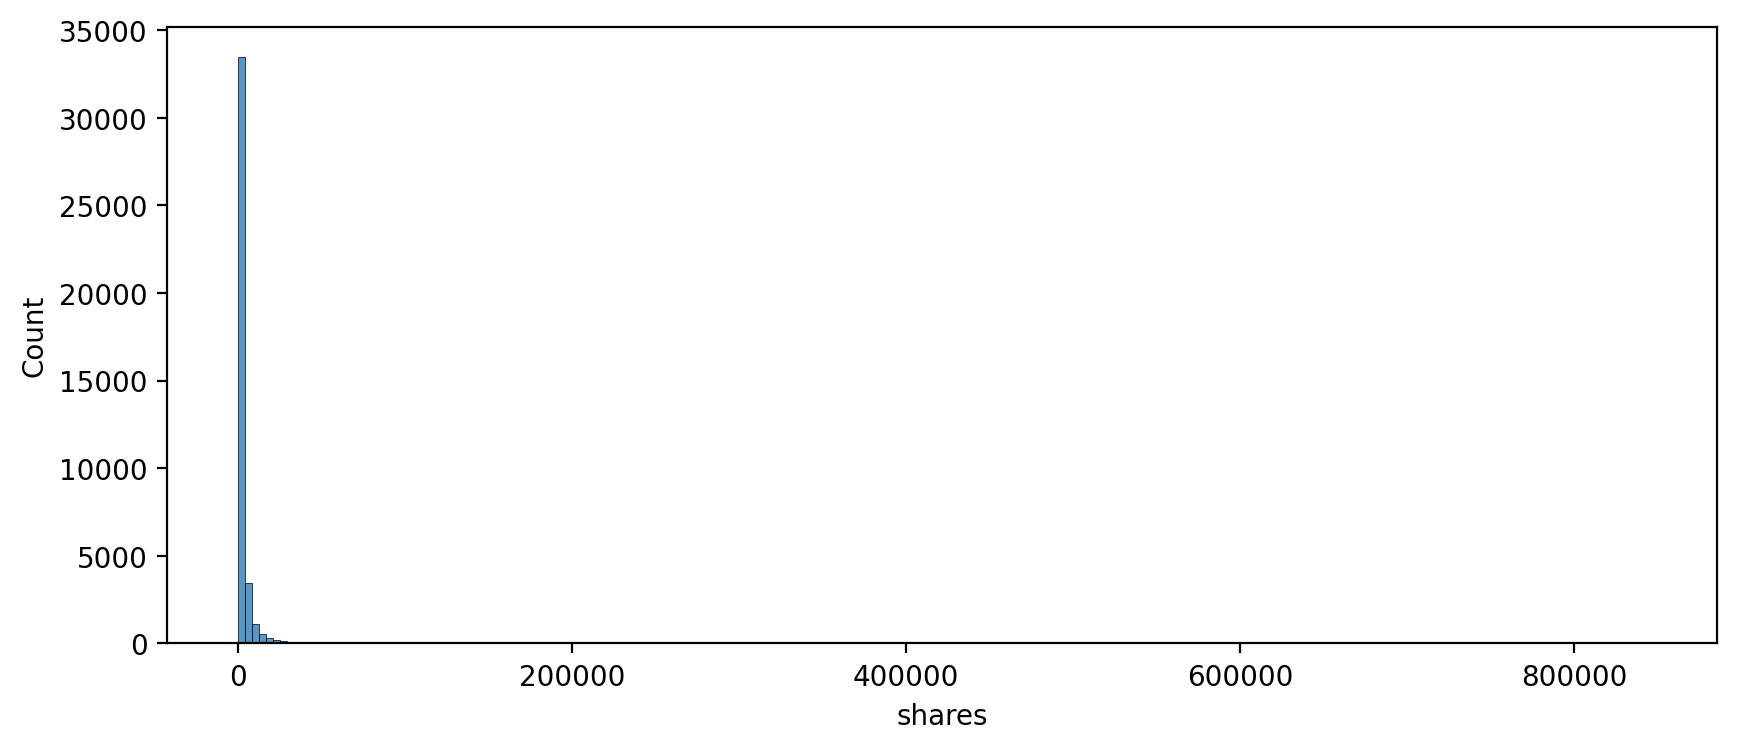

In [ ]:
plt.figure(figsize=(10,4), dpi=200)
sns.histplot(data=df, x='shares', bins=200)

Based on the above histplot we can realize that we have a lot of outlier on our target and that is skewed to the right

In [ ]:
new_share = np.log(df['shares'])

<Axes: xlabel='shares', ylabel='Count'>

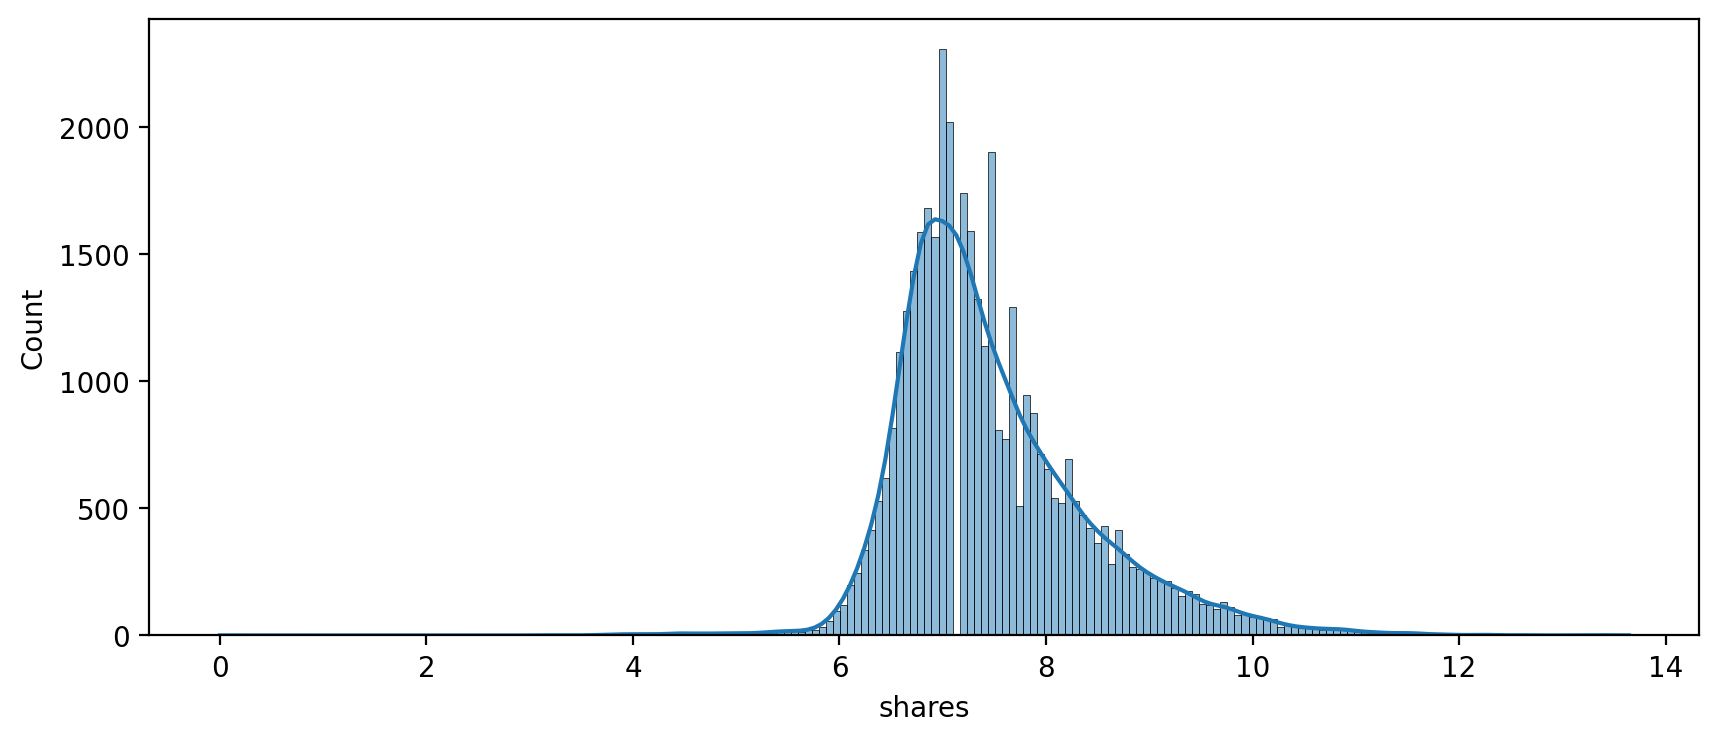

In [ ]:
plt.figure(figsize=(10,4), dpi=200)
sns.histplot(data=new_share, bins=200, kde=True)

After applying a log transformation we can see normal distribbution of shares

<Axes: xlabel='attribbute', ylabel='count'>

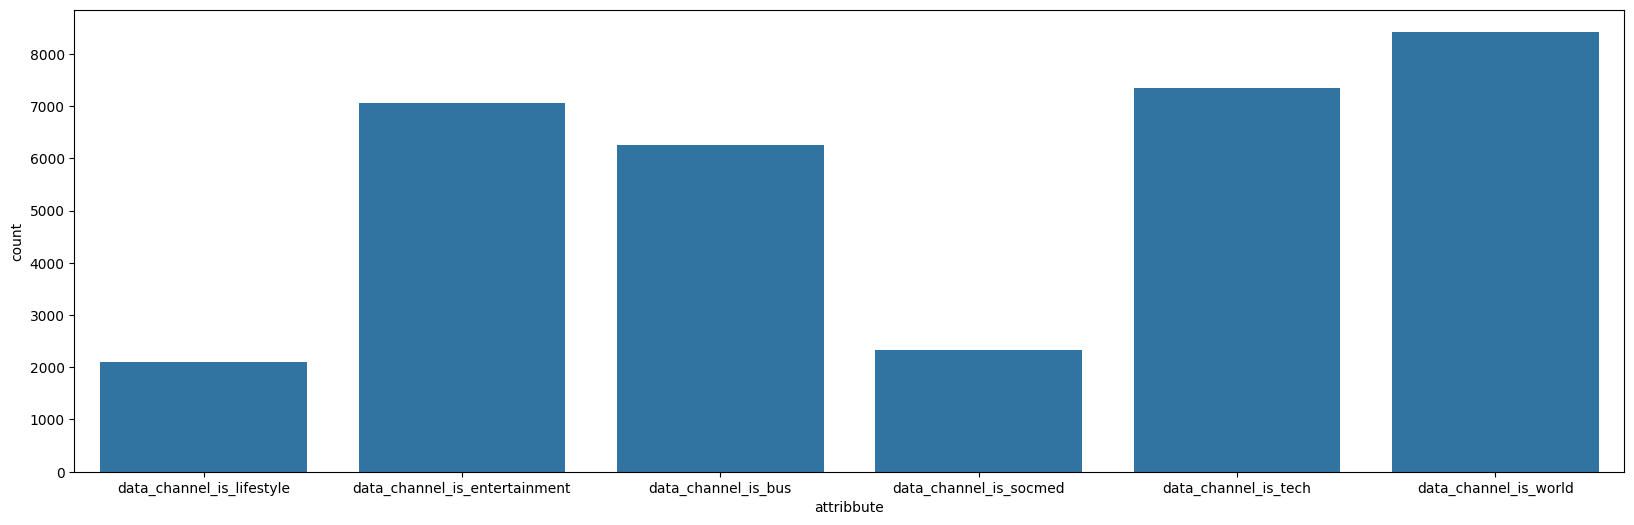

In [ ]:
#counting attributes that are required
plt.figure(figsize=(20,6))
df_bar_plot= pd.DataFrame({'count': [df['data_channel_is_lifestyle'].value_counts()[1], df['data_channel_is_entertainment'].value_counts()[1],
                             df['data_channel_is_bus'].value_counts()[1], df['data_channel_is_socmed'].value_counts()[1],
                             df['data_channel_is_tech'].value_counts()[1], df['data_channel_is_world'].value_counts()[1],],
                   'attribbute': ['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus',
                           'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world']})

sns.barplot(data=df_bar_plot, x='attribbute', y='count')

In [ ]:
df.head(15)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.6000,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.1250,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.8000,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.6000,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.5000,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,0.0,4.359459,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8500.0,8500.0,8500.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022245,0.306718,0.022231,0.022224,0.626582,0.437409,0.071184,0.029730,0.027027,0.523810,0.476190,0.350610,0.136364,0.6,-0.195000,-0.4000,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,0.0,4.654167,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020082,0.114705,0.020024,0.020015,0.825173,0.514480,0.268303,0.080208,0.016667,0.827957,0.172043,0.402039,0.100000,1.0,-0.224479,-0.5000,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,0.0,4.617796,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022224,0.150733,0.243435,0.022224,0.561384,0.543474,0.298613,0.083923,0.015167,0.846939,0.153061,0.427720,0.100000,1.0,-0.242778,-0.5000,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8


 For counting 6 different attributes we made a new data frame with two columns (one for the number of each attribute and another for the names of attributes) and then we showed them with a seaborn barplot.

## Feature importance analysis



In [ ]:
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.028574,0.396167,0.057757,0.028384,0.009615,0.600000,0.185185,0.306

<Axes: >

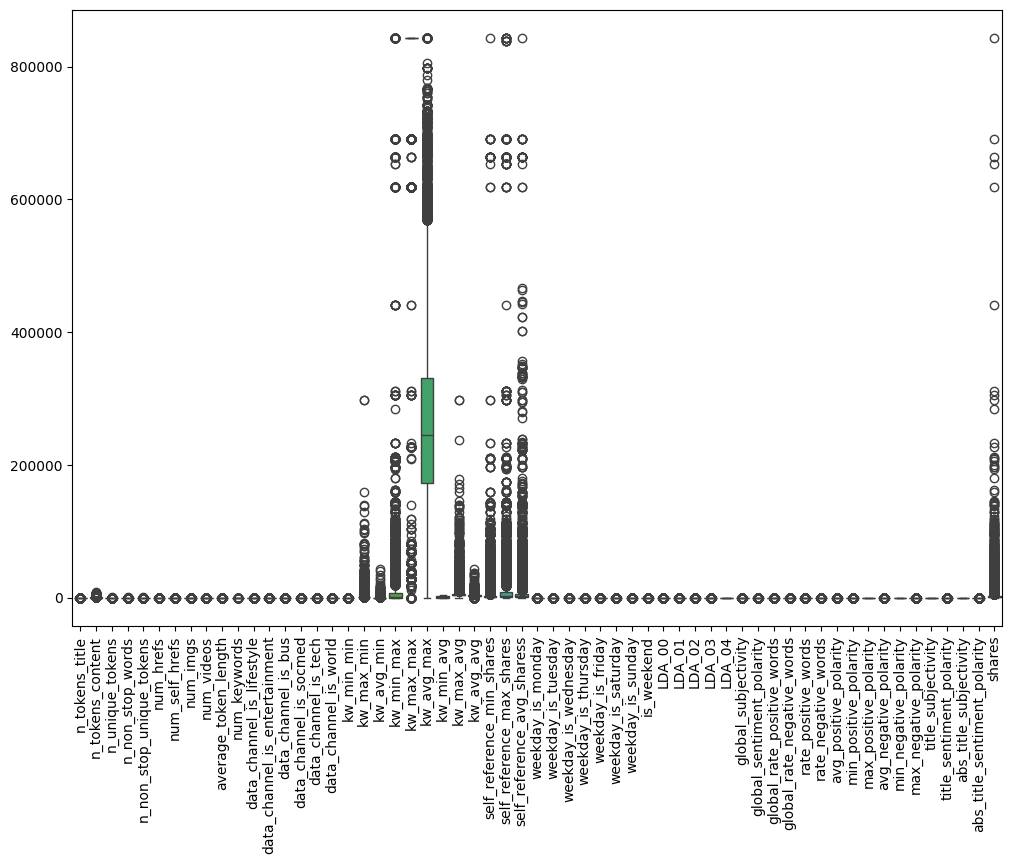

In [ ]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.boxplot(data=df)

According to the above boxplot, we can see some of our features have upper outlier

In [ ]:
#calculating quantiles
Q1 = df.quantile(q=0.25)

Q3 = df.quantile(q=0.75)

IQR = Q3-Q1
for i in range(0, len(IQR)):
    if IQR.iloc[i]>1800:
        print(str(IQR.iloc[i]) + '  ' + IQR.index[i])


7900.0  kw_min_max
158133.125  kw_avg_max
2056.7810317425  kw_min_avg
2457.852337065  kw_max_avg
1961.0  self_reference_min_shares
6900.0  self_reference_max_shares
4218.8125  self_reference_avg_sharess
1854.0  shares


In [ ]:
#removing outliers
upper_limit = 0
for i in range(0, len(IQR)):
    if IQR.iloc[i]>1800:
        upper_limit = df[IQR.index[i]].quantile(q=0.75)+1.5*IQR.iloc[i]
        df = df[df[IQR.index[i]]<upper_limit]


In our dataset, we have some outliers with huge shares amount and we can see them visually with a boxplot and it is better to remove some of them. We calculated the interquartile range and removed samples that its "shares" amount is more than <font color='red'>1.5*IQR</font>. We do not consider any lower limit because we do not have an outlier there. Then we show the amount of that with a seaborn histplot .


In [ ]:
df.shape

(23598, 59)

We find these features and then we calculate the difference between 0.25 quartile and 0.75 quartiles and then we removed upper outliers for them

In [ ]:
df = df.drop('kw_avg_max', axis=1)

We removed 'kw_avg_max' feature because it had a lot of outlier

<Axes: >

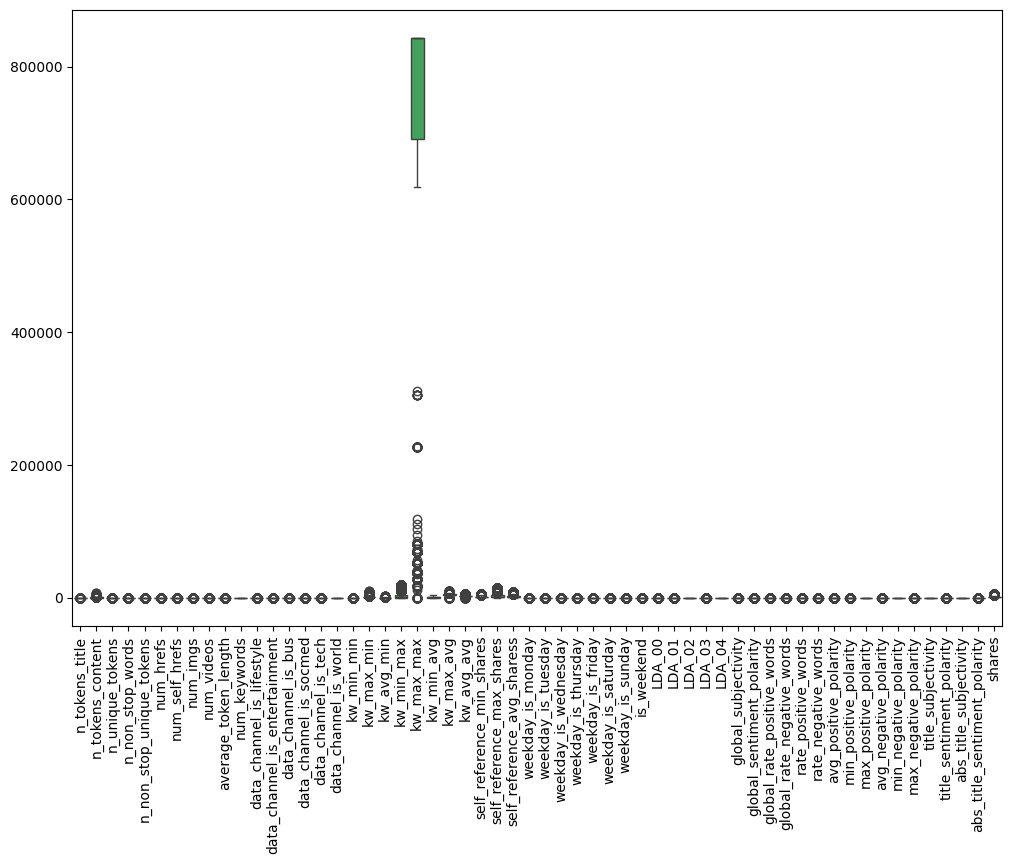

In [ ]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.boxplot(data=df)

Now we can see only one feature remains with outliers

In [ ]:
df = df.drop('kw_max_max', axis=1)

I preferred to delete "kw_max_max" because if I deleted the instances that were outliers in this feature, I would lose a lot of instances.

<Axes: xlabel='shares', ylabel='Count'>

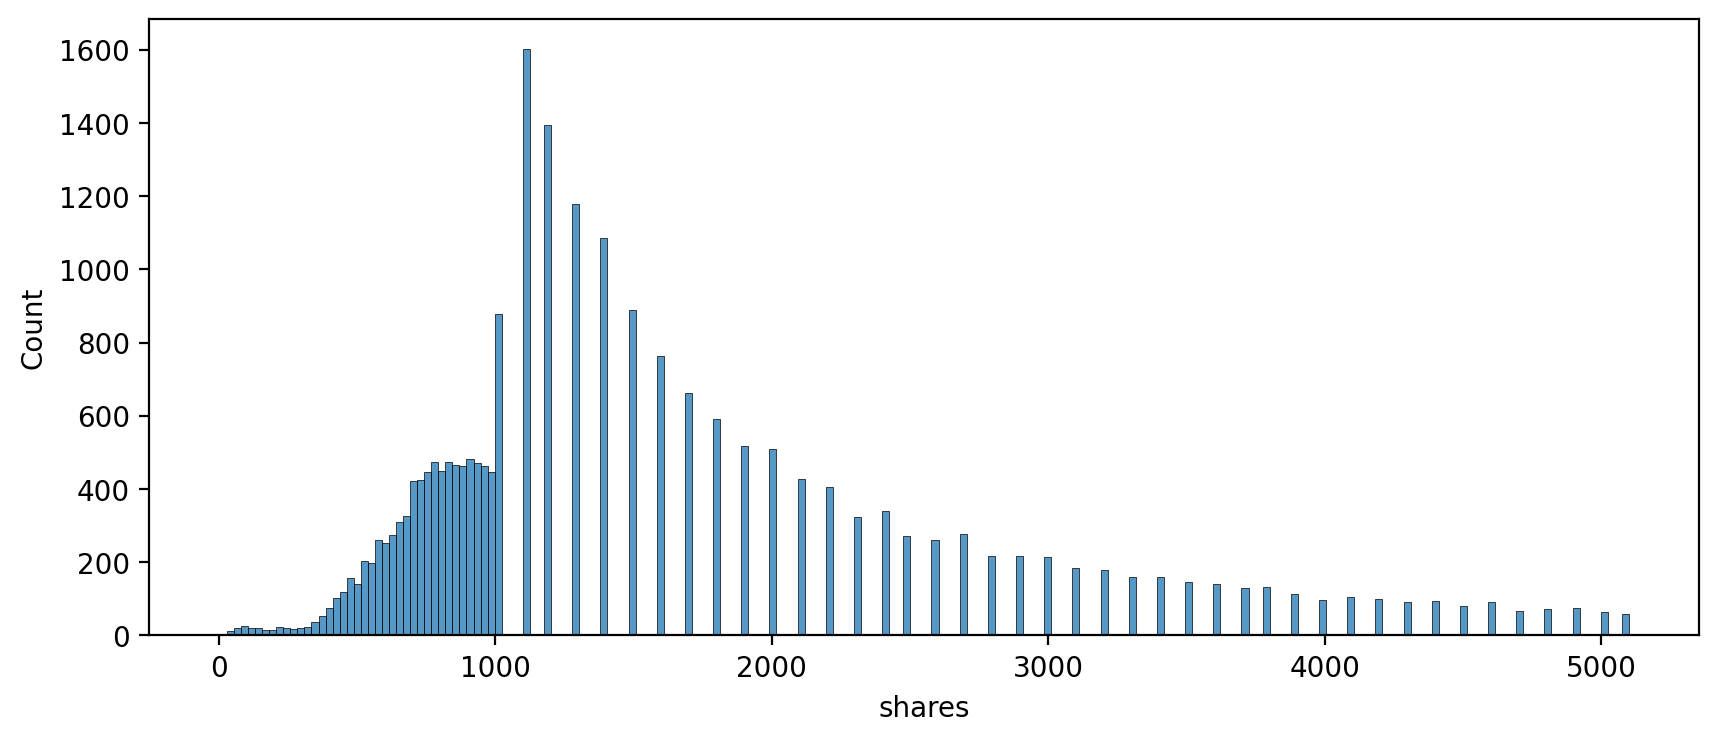

In [ ]:
plt.figure(figsize=(10,4), dpi=200)
sns.histplot(data=df, x='shares', bins=200)

In the above histogram we can see the distribution of 'shares' after removing outliers.obviously, it is more normalized

In [ ]:
df.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_w

In [ ]:
#finding noise in binary columns
print(df['weekday_is_monday'].value_counts())
print(df['weekday_is_tuesday'].value_counts())
print(df['weekday_is_wednesday'].value_counts())
print(df['weekday_is_thursday'].value_counts())
print(df['weekday_is_friday'].value_counts())
print(df['weekday_is_saturday'].value_counts())
print(df['weekday_is_sunday'].value_counts())
print(df['is_weekend'].value_counts())
print(df['data_channel_is_lifestyle'].value_counts())
print(df['data_channel_is_entertainment'].value_counts())
print(df['data_channel_is_bus'].value_counts())
print(df['data_channel_is_socmed'].value_counts())
print(df['data_channel_is_tech'].value_counts())
print(df['data_channel_is_world'].value_counts())



0.0    19594
1.0     4004
Name: weekday_is_monday, dtype: int64
0.0    19152
1.0     4446
Name: weekday_is_tuesday, dtype: int64
0.0    19101
1.0     4497
Name: weekday_is_wednesday, dtype: int64
0.0    19243
1.0     4355
Name: weekday_is_thursday, dtype: int64
0.0    20154
1.0     3444
Name: weekday_is_friday, dtype: int64
0.0    22283
1.0     1315
Name: weekday_is_saturday, dtype: int64
0.0    22061
1.0     1537
Name: weekday_is_sunday, dtype: int64
0.0    20746
1.0     2852
Name: is_weekend, dtype: int64
0.0    22453
1.0     1145
Name: data_channel_is_lifestyle, dtype: int64
0.0    19419
1.0     4179
Name: data_channel_is_entertainment, dtype: int64
0.0    19520
1.0     4078
Name: data_channel_is_bus, dtype: int64
0.0    22450
1.0     1148
Name: data_channel_is_socmed, dtype: int64
0.0    18867
1.0     4731
Name: data_channel_is_tech, dtype: int64
0.0    17501
1.0     6097
Name: data_channel_is_world, dtype: int64


In [ ]:
#remove noisy sample from 'weekday_is_sunday' feature
df = df[((df['weekday_is_sunday']==1)| (df['weekday_is_sunday']==0))]

In [ ]:
#cleaned_df.to_csv('cleaned_data.csv')

In [ ]:
df.corr()['shares'].sort_values()

data_channel_is_world           -0.138966
LDA_02                          -0.133009
data_channel_is_entertainment   -0.089166
rate_negative_words             -0.074894
LDA_01                          -0.064298
n_unique_tokens                 -0.054231
n_non_stop_unique_tokens        -0.053710
n_tokens_title                  -0.046884
weekday_is_wednesday            -0.042926
weekday_is_tuesday              -0.041795
weekday_is_thursday             -0.036681
min_positive_polarity           -0.033637
average_token_length            -0.031451
global_rate_negative_words      -0.028488
weekday_is_monday               -0.024484
n_non_stop_words                -0.016334
min_negative_polarity           -0.003305
data_channel_is_bus             -0.000243
num_videos                       0.001689
avg_negative_polarity            0.001885
abs_title_subjectivity           0.005780
max_negative_polarity            0.007845
title_subjectivity               0.016001
avg_positive_polarity            0

In the two next following cells, we found 20 first correlated features that have more than 5% correlation with corr() function

In [ ]:
important_features1 = pd.DataFrame(abs(df.corr()['shares']), df.columns).reset_index()
important_features1.columns = ['feature', 'corr']
important_features1 = important_features1[important_features1['corr']>0.05].sort_values(by='corr', ascending=False)

In [ ]:
important_features1 = important_features1[important_features1['feature']!='shares']
important_features1 = important_features1.head(20)
important_features1

,feature,corr
23,kw_avg_avg,0.159223
34,is_weekend,0.152646
16,data_channel_is_world,0.138966
37,LDA_02,0.133009
15,data_channel_is_tech,0.119657
22,kw_max_avg,0.119289
26,self_reference_avg_sharess,0.115098
32,weekday_is_saturday,0.114913
39,LDA_04,0.107461
14,data_channel_is_socmed,0.107360


In the two next following cells, we found 20 first correlated features with SelectKBest function

In [ ]:
X = df.drop('shares', axis=1)
y = df['shares']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

best_features = SelectKBest(score_func=f_classif, k=20)
important_features2 = pd.DataFrame(best_features.fit(X,y).scores_, X.columns).reset_index()
important_features2.columns = ['feature', 'score']
important_features2 = important_features2.sort_values(by='score', ascending=False)
important_features2 = important_features2.head(20)
important_features2

,feature,score
16,data_channel_is_world,1.887646
37,LDA_02,1.856495
23,kw_avg_avg,1.743615
12,data_channel_is_entertainment,1.664706
19,kw_avg_min,1.418891
18,kw_max_min,1.403637
34,is_weekend,1.389110
36,LDA_01,1.385951
26,self_reference_avg_sharess,1.385103
39,LDA_04,1.350240


In [ ]:
#Here we want to find the similar discovered features found with the last two function
index1 = pd.Index(important_features1['feature'])
index2 = pd.Index(important_features2['feature'])
final_indexs = index1.intersection(index2)
final_indexs

Index(['kw_avg_avg', 'is_weekend', 'data_channel_is_world', 'LDA_02',
       'data_channel_is_tech', 'kw_max_avg', 'self_reference_avg_sharess',
       'LDA_04', 'self_reference_min_shares', 'kw_avg_min',
       'self_reference_max_shares', 'data_channel_is_entertainment',
       'rate_negative_words', 'num_keywords', 'global_sentiment_polarity'],
      dtype='object', name='feature')

<Axes: >

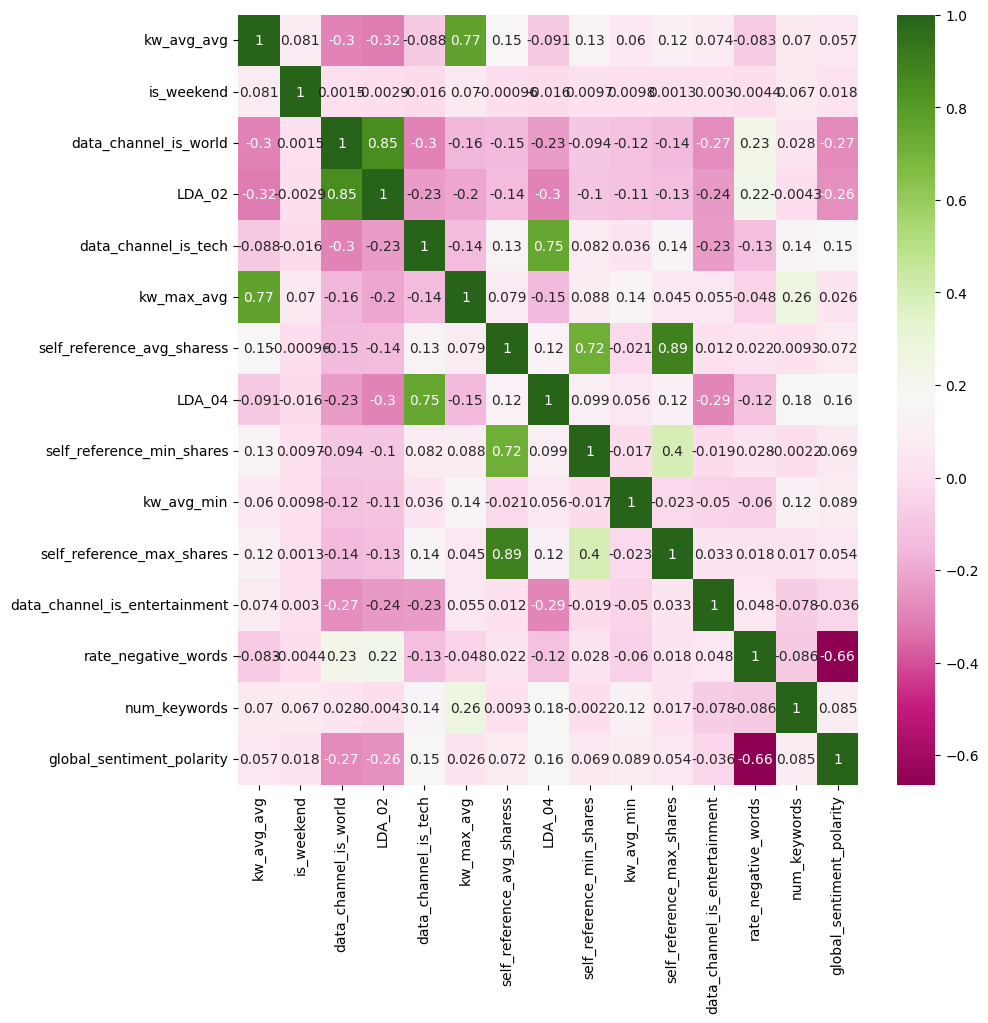

In [ ]:
heat_features = X[final_indexs]
plt.figure(figsize=(10, 10))
sns.heatmap(heat_features.corr(), cmap='PiYG', annot=True)

In [ ]:
#We removed one of the two important features which they are correlated more than 70%
feature_must_remove = ['data_channel_is_tech', 'kw_max_avg', 'self_reference_avg_sharess', 'data_channel_is_world']
lst=list(final_indexs.values)
final_important_features = [fea for fea in lst if fea not in feature_must_remove]
final_important_features

['kw_avg_avg',
 'is_weekend',
 'LDA_02',
 'LDA_04',
 'self_reference_min_shares',
 'kw_avg_min',
 'self_reference_max_shares',
 'data_channel_is_entertainment',
 'rate_negative_words',
 'num_keywords',
 'global_sentiment_polarity']

Now we want to show some plot for explored important features

<Axes: title={'center': 'shares vs kw_avg_avg'}, xlabel='kw_avg_avg', ylabel='shares'>

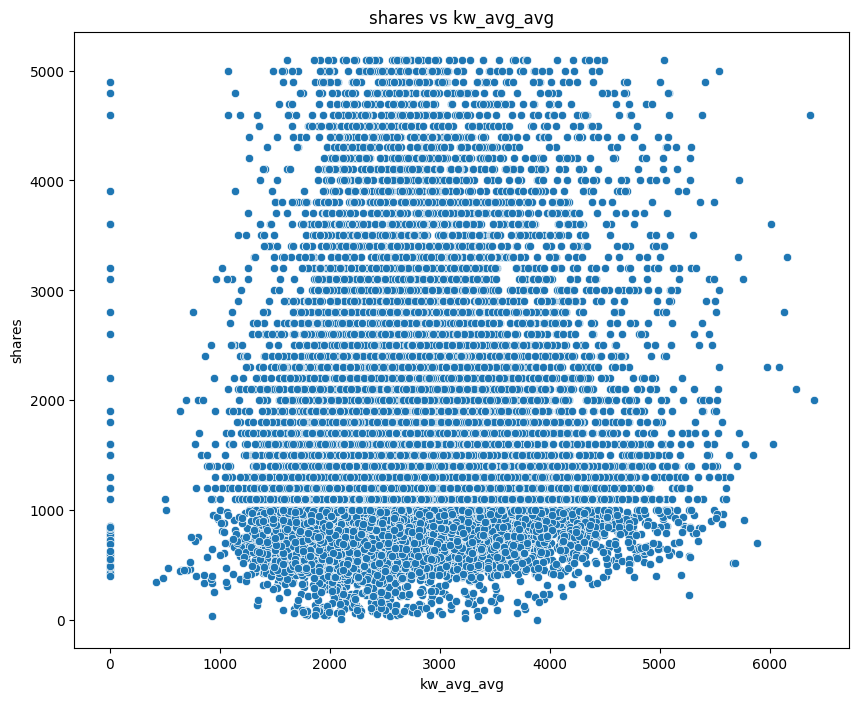

In [ ]:
plt.figure(figsize=(10,8))
plt.title('shares vs kw_avg_avg')
sns.scatterplot(data=df, x='kw_avg_avg', y='shares')

<ipython-input-40-2d2d4f33d6d7>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=df, x='is_weekend', y='shares', ci=False)


<Axes: title={'center': 'numbber of articles shares during weekend'}, xlabel='is_weekend', ylabel='shares'>

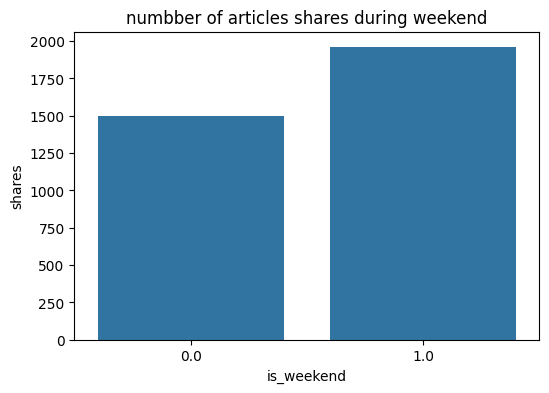

In [ ]:
plt.figure(figsize=(6,4))
plt.title('numbber of articles shares during weekend')
sns.barplot(data=df, x='is_weekend', y='shares', ci=False)

<Axes: title={'center': 'number of articles during weekend'}, xlabel='is_weekend', ylabel='count'>

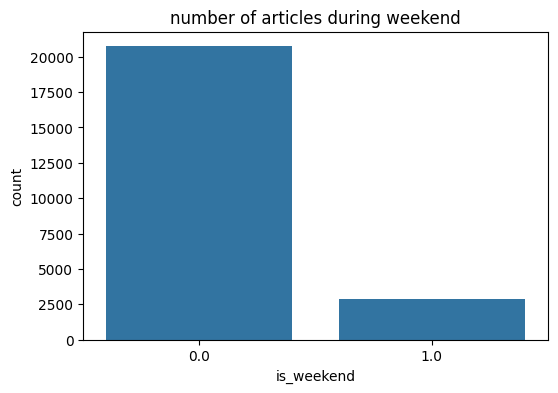

In [ ]:
plt.figure(figsize=(6,4))
plt.title('number of articles during weekend')
sns.countplot(x = df['is_weekend'])

<ipython-input-42-f0c84a91af4b>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=df, x='num_keywords', y='shares', ci=False)


<Axes: title={'center': 'Number of articles shares by number of keywords'}, xlabel='num_keywords', ylabel='shares'>

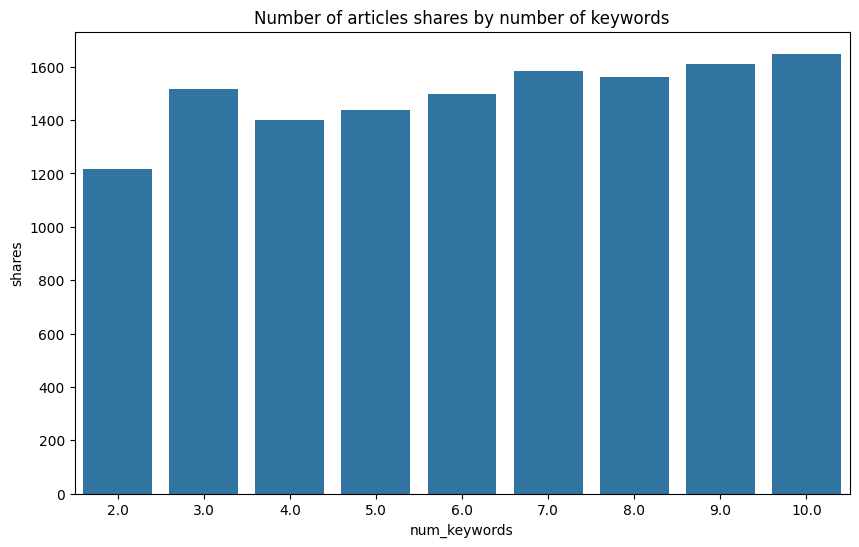

In [ ]:
plt.figure(figsize=(10, 6))

plt.title('Number of articles shares by number of keywords')
sns.barplot(data=df, x='num_keywords', y='shares', ci=False)

We can see the number of shares increased when the number of keyword increased

<hr>

## Model Selection




In [ ]:
# Discretizing target column to five different classes
from sklearn.preprocessing import KBinsDiscretizer
new_data = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
new_data.fit(df['shares'].values.reshape(-1, 1))
discretized_shares = new_data.transform(df['shares'].values.reshape(-1, 1))
df['shares'] = discretized_shares
df['shares'].value_counts()

3.0    5447
4.0    4867
0.0    4709
1.0    4399
2.0    4176
Name: shares, dtype: int64

From here, we make two different groups of features; one based on the important features that had been chosen in feature important part and another group to implement and train our models with PCA

In [ ]:
# Choosing the best feature based on important features explored in previous part
X = X[final_important_features]
y = df['shares']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=77)

In [ ]:
# Fix another set of feature for train our model with PLC
from sklearn.model_selection import train_test_split
X_pca = df.drop('shares', axis=1)
y_pca = df['shares']
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.3, random_state=77)





In [ ]:
# Scaling important feature with standardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#for PCA, it is better to first find best component then scale them.
from sklearn.decomposition import PCA

pca = PCA()

df_train_tr = pca.fit_transform(X_train_pca)
df_test_tr=pca.transform(X_test_pca)
pca.explained_variance_ratio_

array([5.26624021e-01, 3.28992097e-01, 6.75978305e-02, 3.58660607e-02,
       2.20244161e-02, 8.47102349e-03, 5.27883195e-03, 2.45455396e-03,
       2.27271982e-03, 3.41101366e-04, 7.36746508e-05, 1.89121441e-06,
       1.10056108e-06, 2.37354677e-07, 1.83417361e-07, 1.10369947e-07,
       7.01266035e-08, 1.64606072e-08, 7.25521203e-09, 5.99352483e-09,
       5.42516903e-09, 4.93433626e-09, 4.78614465e-09, 4.54340663e-09,
       4.41470839e-09, 3.84592951e-09, 3.69485709e-09, 2.07687648e-09,
       1.65115543e-09, 1.53877987e-09, 1.44309187e-09, 1.34997687e-09,
       1.28486525e-09, 1.16955252e-09, 6.47775548e-10, 6.38227157e-10,
       6.29177516e-10, 5.73310202e-10, 5.07858564e-10, 3.93480063e-10,
       3.03651021e-10, 2.35991580e-10, 1.66893891e-10, 1.26410679e-10,
       1.15076872e-10, 5.91504577e-11, 5.13850767e-11, 3.71915305e-11,
       2.10687082e-11, 1.34428595e-11, 3.27227788e-12, 5.15269792e-13,
       3.50991232e-13, 3.80346568e-33, 3.80346568e-33, 3.80346568e-33])

In [ ]:
#Based on the variance_ratio we picked 4 first components as they have 96% variannce to our data
pca = PCA(n_components=4)

train_pca = pca.fit_transform(X_train_pca)

test_pca = pca.transform(X_test_pca)

pca.explained_variance_ratio_.sum()

0.9590800092639166

In [ ]:
# Here we scale picked components
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_pca)
train_pca = scaler.transform(train_pca)
test_pca = scaler.transform(test_pca)

From here we started to train models with two different data set( important features, PCA).<br />
For tuning hyperparameters we will use GrideSearchCV

In [ ]:
#Learning Decision Tree model with important feature
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
tree_model = DecisionTreeClassifier()
parameter_grid_tree = {'criterion':['gini', 'entropy'], 'max_depth':range(1,11,2), 'min_samples_split': range(2,21,5),
                      'min_samples_leaf': range(2,21,5)}
grid_search_tree = GridSearchCV(tree_model, parameter_grid_tree, cv=5, n_jobs=-1)
grid_search_tree.fit(X_train, y_train)
print(grid_search_tree.best_params_)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 17}


In [ ]:
#Learning Decision Tree model with PCA
pca_tree_model = DecisionTreeClassifier()
parameter_grid_tree_pca = {'criterion':['gini', 'entropy'], 'max_depth':range(1,11,2), 'min_samples_split': range(2,21,5),
                      'min_samples_leaf': range(2,21,5)}
grid_search_tree_pca = GridSearchCV(pca_tree_model, parameter_grid_tree_pca, cv=5, n_jobs=-1)
grid_search_tree_pca.fit(train_pca, y_train)
print(grid_search_tree_pca.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 17, 'min_samples_split': 2}


In [ ]:
#Predict on test part of data set
predict_tree = grid_search_tree.predict(X_test)
predict_tree_pca = grid_search_tree_pca.predict(test_pca)

In [ ]:
#Calculating accuracy for both models learned with important features and PCA
from sklearn.metrics import accuracy_score
print("accuracy of Decision tree with important features is: " + str(accuracy_score(y_test, predict_tree)))
print("accuracy of Decision tree with PCA is: " + str(accuracy_score(y_test, predict_tree_pca)))

accuracy of Decision tree with important features is: 0.28206214689265535
accuracy of Decision tree with PCA is: 0.25663841807909604


In [ ]:
#Learning SVM model with important feature
from sklearn.svm import SVC
svm = SVC()
parameter_grid_svm = {'C':[0.1, 1], 'kernel':['linear','rbf', 'sigmoid']}
grid_search_svm = GridSearchCV(svm, parameter_grid_svm, cv=5, n_jobs=-1)
grid_search_svm.fit(X_train, y_train)
grid_search_svm.best_params_

{'C': 0.1, 'kernel': 'rbf'}

In [ ]:
#Learning SVM model with PCA
svm_pca = SVC()
parameter_grid_svm_pca = {'C':[0.1, 1], 'kernel':['linear','rbf', 'sigmoid']}
grid_search_svm_pca = GridSearchCV(svm_pca, parameter_grid_svm_pca, cv=5, n_jobs=-1)
grid_search_svm_pca.fit(train_pca, y_train)
grid_search_svm_pca.best_params_

{'C': 0.1, 'kernel': 'rbf'}

In [ ]:
#Predict on test part of data set
predict_svm = grid_search_svm.predict(X_test)
predict_svm_pca = grid_search_svm_pca.predict(test_pca)


In [ ]:
#Calculating accuracy for both models learned with important features and PCA
print("accuracy of SVM with important features is: " + str(accuracy_score(y_test, predict_svm)))
print("accuracy of SVM with PCA is: " + str(accuracy_score(y_test, predict_svm_pca)))

accuracy of SVM with important features is: 0.29901129943502824
accuracy of SVM with PCA is: 0.26822033898305087


In [ ]:
#Learning Random Forest model with important feature
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rfc = RandomForestClassifier()
parameter_grid_rfc = {'criterion':['gini', 'entropy'], 'max_depth':range(1,11,5), 'min_samples_split': range(2,21,10),
                      'min_samples_leaf': range(2,21,10)}
grid_search_rfc = GridSearchCV(rfc, parameter_grid_rfc, cv=5, n_jobs=-1)
grid_search_rfc.fit(X_train, y_train)
grid_search_rfc.best_params_


{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 12,
 'min_samples_split': 12}

In [ ]:
#Learning Random Forest model with PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rfc_pca = RandomForestClassifier()
parameter_grid_rfc_pca = {'criterion':['gini', 'entropy'], 'max_depth':range(1,11,5), 'min_samples_split': range(2,21,10),
                      'min_samples_leaf': range(2,21,10)}
grid_search_rfc_pca = GridSearchCV(rfc_pca, parameter_grid_rfc_pca, cv=5, n_jobs=-1)
grid_search_rfc_pca.fit(train_pca, y_train)
grid_search_rfc_pca.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [ ]:
#Predict on test part of data set
predict_rfc = grid_search_rfc.predict(X_test)
predict_rfc_pca = grid_search_svm_pca.predict(test_pca)

In [ ]:
#Calculating accuracy for both models learned with important features and PCA
print("accuracy of Random Forest Classifier with important features is: " + str(accuracy_score(y_test, predict_rfc)))
print("accuracy of Random Forest Classifier with PCA is: " + str(accuracy_score(y_test, predict_rfc_pca)))

accuracy of Random Forest Classifier with important features is: 0.298728813559322
accuracy of Random Forest Classifier with PCA is: 0.26822033898305087


In [ ]:
#Learning MLPN model with important features
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier()
parameter_grid_mlpc = {
    'hidden_layer_sizes': [(10,30,10)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001],
    'learning_rate': ['constant','adaptive'],
}
grid_search_mlpc = GridSearchCV(mlpc, parameter_grid_mlpc, cv=5, n_jobs=-1)
grid_search_mlpc.fit(X_train, y_train)
grid_search_mlpc.best_params_

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': (10, 30, 10),
 'learning_rate': 'adaptive',
 'solver': 'sgd'}

In [ ]:
#Learning MLPN model with PCA
from sklearn.neural_network import MLPClassifier
mlpc_pca = MLPClassifier()
parameter_grid_mlpc_pca = {
    'hidden_layer_sizes': [(10,30,10)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001],
    'learning_rate': ['constant','adaptive'],
}
grid_search_mlpc_pca = GridSearchCV(mlpc_pca, parameter_grid_mlpc_pca, cv=5, n_jobs=-1)
grid_search_mlpc_pca.fit(train_pca, y_train)
grid_search_mlpc_pca.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (10, 30, 10),
 'learning_rate': 'adaptive',
 'solver': 'adam'}

In [ ]:
#Predict on test part of data set
predict_mlpc = grid_search_mlpc.predict(X_test)
predict_mlpc_pca = grid_search_mlpc_pca.predict(test_pca)

In [ ]:
#Calculating accuracy for both models learned with important features and PCA
print("accuracy of MLPClassifier with important features is: " + str(accuracy_score(y_test, predict_mlpc)))
print("accuracy of MLPClassifier with PCA is: " + str(accuracy_score(y_test, predict_mlpc_pca)))

accuracy of MLPClassifier with important features is: 0.29293785310734466
accuracy of MLPClassifier with PCA is: 0.2639830508474576
